In [1]:
# 数据处理
import numpy as np
import pandas as pd

# 数据可视化
import matplotlib.pyplot as plt

# 特征选择和编码
from sklearn.preprocessing import LabelEncoder

# 机器学习
from sklearn import model_selection, tree, preprocessing, metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# 网格搜索、随机搜索
import scipy.stats as st
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 模型度量（分类）
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# 警告处理 
import warnings
warnings.filterwarnings('ignore')

# 在Jupyter上画图
%matplotlib inline

train = pd.read_csv('train_process.csv')
test = pd.read_csv('test_process.csv')
train.shape, test.shape

((800000, 47), (200000, 46))

In [2]:
train.columns,test.columns

(Index(['Unnamed: 0', 'id', 'loanAmnt', 'term', 'interestRate', 'installment',
        'grade', 'subGrade', 'employmentTitle', 'employmentLength',
        'homeOwnership', 'annualIncome', 'verificationStatus', 'issueDate',
        'isDefault', 'purpose', 'postCode', 'regionCode', 'dti',
        'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
        'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
        'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
        'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10',
        'n11', 'n12', 'n13', 'n14'],
       dtype='object'),
 Index(['Unnamed: 0', 'id', 'loanAmnt', 'term', 'interestRate', 'installment',
        'grade', 'subGrade', 'employmentTitle', 'employmentLength',
        'homeOwnership', 'annualIncome', 'verificationStatus', 'issueDate',
        'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
        'ficoRangeLow', 'ficoRangeHigh', 'openAcc'

In [3]:
# 删除Unnamed: 0
del train['Unnamed: 0']
del test['Unnamed: 0']


In [4]:
train.shape, test.shape

((800000, 46), (200000, 45))

In [5]:
train.columns,test.columns

(Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
        'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
        'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
        'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
        'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
        'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
        'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
        'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10',
        'n11', 'n12', 'n13', 'n14'],
       dtype='object'),
 Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
        'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
        'annualIncome', 'verificationStatus', 'issueDate', 'purpose',
        'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
        'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptc

In [6]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = train['isDefault']
data_features_part = train[[x for x in train.columns if x != 'isDefault' and 'id']]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)

In [7]:
x_train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
498932,498932,12000.0,3,11.12,393.55,1,7,238392.0,5,1,...,5.0,4.0,6.0,10.0,4.0,9.0,0.0,0.0,0.0,1.0
393742,393742,30000.0,3,13.99,1025.19,2,13,8842.0,10,0,...,4.0,6.0,4.0,4.0,1.0,9.0,0.0,0.0,1.0,3.0
754504,754504,6000.0,3,11.53,197.95,1,9,808.0,9,1,...,3.0,2.0,8.0,9.0,8.0,8.0,0.0,0.0,0.0,0.0
97944,97944,8875.0,3,16.20,312.90,2,13,145707.0,8,2,...,10.0,29.0,7.0,21.0,3.0,11.0,0.0,0.0,0.0,3.0
564369,564369,35000.0,3,13.59,1189.26,2,11,1440.0,3,2,...,6.0,5.0,3.0,8.0,2.0,4.0,0.0,0.0,0.0,1.0


In [8]:
y_train.head()

498932    0.0
393742    0.0
754504    0.0
97944     0.0
564369    0.0
Name: isDefault, dtype: float64

In [9]:
# 绘制AUC曲线
import time
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [10]:
# Logistic Regression
clf1 = LogisticRegression(solver='sag', max_iter=100, multi_class='multinomial')
clf1.fit(x_train, y_train)
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf1.predict(x_train)
test_predict = clf1.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))


The accuracy of the Logistic Regression is: 0.7998890625
The accuracy of the Logistic Regression is: 0.8024


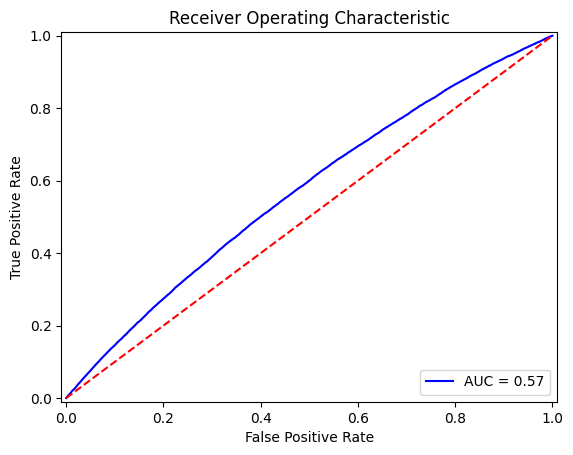

In [11]:
plot_roc_curve(y_test,clf1.predict_proba(x_test)[:,1])

In [12]:
# Random Forest

clf2 = RandomForestClassifier()
clf2.fit(x_train, y_train)
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf2.predict(x_train)
test_predict = clf2.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Random Forest is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Random Forest is:',metrics.accuracy_score(y_test,test_predict))

The accuracy of the Random Forest is: 0.9999765625
The accuracy of the Random Forest is: 0.8065


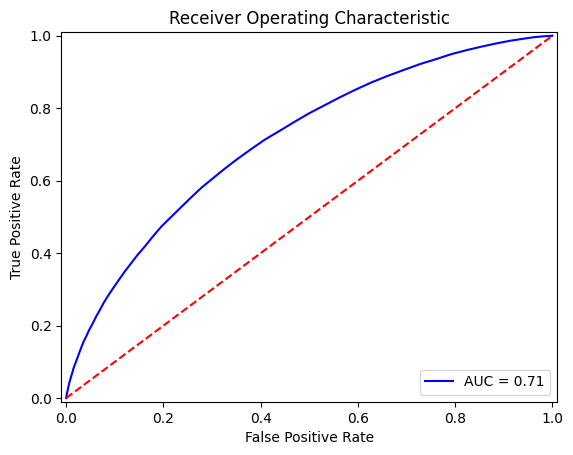

In [13]:
plot_roc_curve(y_test,clf2.predict_proba(x_test)[:,1])

In [14]:
# 决策树
clf3 = DecisionTreeClassifier()
clf3.fit(x_train, y_train)
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf3.predict(x_train)
test_predict = clf3.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the 决策树 is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the 决策树 is:',metrics.accuracy_score(y_test,test_predict))


The accuracy of the 决策树 is: 1.0
The accuracy of the 决策树 is: 0.7055625


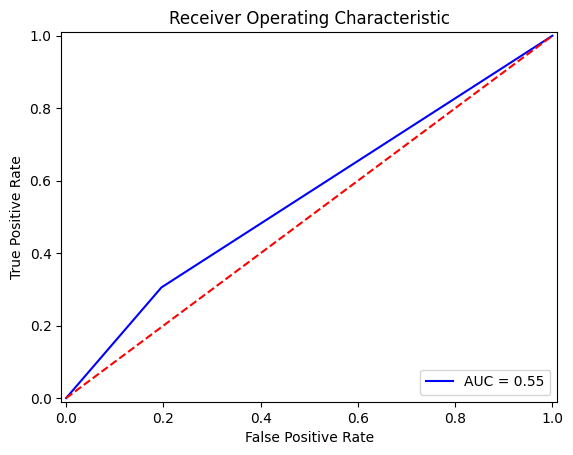

In [15]:
plot_roc_curve(y_test, clf3.predict_proba(x_test)[:,1])


In [16]:
# Gradient Boosting Trees

clf4 = GradientBoostingClassifier()
clf4.fit(x_train, y_train)
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf4.predict(x_train)
test_predict = clf4.predict(x_test)
from sklearn import metrics
## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Gradient Boosting Trees is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Gradient Boosting Trees is:',metrics.accuracy_score(y_test,test_predict))

The accuracy of the Gradient Boosting Trees is: 0.80476875
The accuracy of the Gradient Boosting Trees is: 0.8068


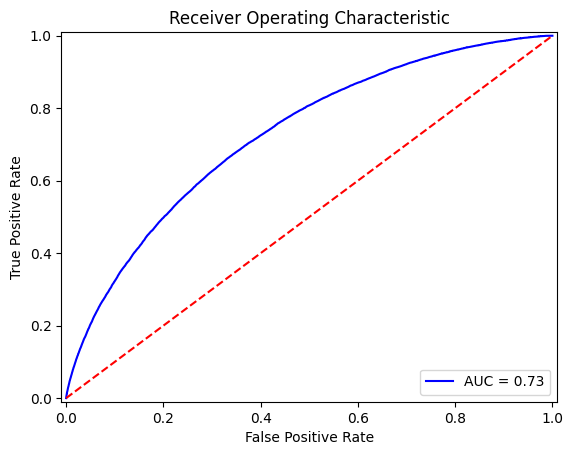

In [17]:
plot_roc_curve(y_test, clf4.predict_proba(x_test)[:,1])

In [18]:
print(x_train.shape)
print(test.shape)
y_scores4 = clf4.predict_proba(test)
test['isDefault'] = y_scores4[:,1]
test[['id','isDefault']].to_csv("results4.csv",index=False)

(640000, 45)
(200000, 45)
